# Linear and Multiple Linear Regression

## Loading Test Datasets

In [7]:
from sklearn import datasets 
import numpy as np
import pandas as pd
data = datasets.load_boston()

print(data.DESCR) # data description
print(data.feature_names) # column names of independent variables

df = pd.DataFrame(data.data, columns=data.feature_names) 
target = pd.DataFrame(data.target, columns=["MEDV"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Train model

In [16]:
from sklearn import linear_model

X = df
y = target['MEDV']

lm = linear_model.LinearRegression() 

model = lm.fit(X,y)
predictions = lm.predict(X)

## Prediction results

In [ ]:
print(lm.score(X,y)) # R^2 score of the model
print(lm.coef_) # estimated coefficients for the linear regression problem
print(lm.intercept_) # independent term in the linear model

# Train/Test Split and Cross Validation

## Overfitting

## Cross Validation

* Leave-one-out cross-  validation (LOOCV)
* Leave-k-out cross-validation
* k-fold cross-validation

## Train/Test Split

In [72]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline

# Loading test data
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() 
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns) 
X = diabetes.data
y = diabetes.target
# And splitting them
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

## Fit training data

0.5537758739781391

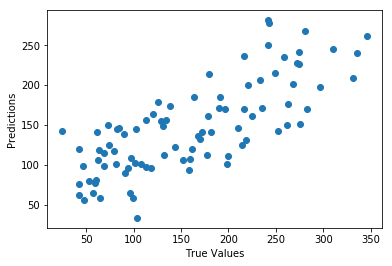

In [73]:
lm = linear_model.LinearRegression() 
model = lm.fit(X_train, y_train) 
predictions = lm.predict(X_test)

# Plot the model
plt.scatter(y_test, predictions) 
plt.xlabel('True Values') 
plt.ylabel('Predictions')

# Show accuracy score 
model.score(X_test, y_test)

### Leave One Out Cross Validation (LOOCV)

In [95]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target
logreg = LogisticRegression()
mselector = LeaveOneOut()
mselector.get_n_splits(X)

for train_index, test_index in mselector.split(X): 
#     print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
#     print(X_train, X_test, y_train, y_test)

In [104]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
loo = LeaveOneOut()

scores = cross_val_score(logreg, X, y, cv=loo)

print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  150
Средняя правильность: 0.95


In [108]:
from sklearn import metrics

predictions = cross_val_predict(logreg, X, y, cv=6)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.93


## K-Folds Cross Validation

In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=5)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  5
Средняя правильность: 0.96
